# Proejct Preliminary Work - week 7

In [43]:
import numpy as np
import os
import struct
import requests
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
def get_number(byte):
    return int.from_bytes(byte, "big")
def parse_images(file_path):
    with open(file_path, "rb") as f:
        magic_num = get_number(f.read(4))
        image_count = get_number(f.read(4))
        rows = get_number(f.read(4))
        cols = get_number(f.read(4))
        print("rows: ", rows, "cols", cols);
        images = np.zeros((image_count, rows, cols))

        current_img = 0
        current_row = 0
        current_col = 0

        while current_img < image_count:
            num = get_number(f.read(1))
            images[current_img, current_row, current_col] = num

            if current_row == rows - 1 and current_col == cols - 1:
                current_img += 1
                current_row = 0
                current_col = 0
            elif current_col == cols - 1:
                current_row += 1
                current_col = 0
            else:
                current_col += 1
    return images
def parse_labels(file_path):
    with open(file_path, "rb") as f:
        magic_num = get_number(f.read(4))
        label_count = get_number(f.read(4))

        labels = np.zeros((label_count))
        current_label = 0

        while current_label < label_count:
            num = get_number(f.read(1))
            labels[current_label] = num
            current_label += 1

        return labels
def parse_data():
    train_images_path =os.path.abspath("train-images-idx3-ubyte")
    test_images_path = os.path.abspath("t10k-images-idx3-ubyte")

    train_labels_path =os.path.abspath("train-labels-idx1-ubyte")
    test_labels_path = os.path.abspath("t10k-labels-idx1-ubyte")

    x_train = parse_images(train_images_path)
    y_train = parse_labels(train_labels_path)

    x_test = parse_images(test_images_path)
    y_test = parse_labels(test_labels_path)

    return (x_train, y_train), (x_test, y_test)

In [3]:
(x_train, y_train), (x_test, y_test) = parse_data()

rows:  28 cols 28
rows:  28 cols 28


In [4]:
def printIMG(index):
    for a in range(28):
        for b in range(28):
            print(1 if x_train[index][a][b] > 50 else 0, end=" ")
        print(" ")


In [5]:
for i in range(5):
    printIMG(i)
    print()


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0  
0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 

In [6]:
x = y_train.reshape(-1,1)
dataframe = pd.DataFrame.from_records(x)
dataframe = dataframe.rename(columns={0:'digit'})
dataframe.head(3)

,digit
0,5.0
1,0.0
2,4.0


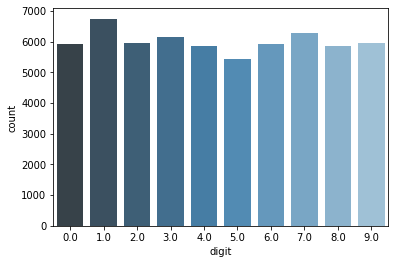

In [7]:
ax = sns.countplot(x=dataframe.iloc[:,0], data=dataframe, palette='Blues_d')
fig = ax.get_figure()
fig.savefig("train_digit.png")
ax

In [8]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0.0: 5923,
 1.0: 6742,
 2.0: 5958,
 3.0: 6131,
 4.0: 5842,
 5.0: 5421,
 6.0: 5918,
 7.0: 6265,
 8.0: 5851,
 9.0: 5949}

In [9]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [10]:
# x_train = x_train[:1000]
# y_train = y_train[:1000]
# x_test = x_test[:2000]
# y_test = y_test[:2000]
# features_train = x_train.reshape(1000, 28 * 28)
# target_train = y_train
# features_test = x_test.reshape(2000, 28 * 28)
# target_test = y_test
# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(features_train,target_train)

In [11]:
# num_neighbors = []
# err_train = []
# err_test = []
# for K in np.arange(10)+1:
#     knn = KNeighborsClassifier(n_neighbors=K)
#     knn.fit(features_train,target_train)
#     num_neighbors.append(K)
#     err_train.append(1-knn.score(features_train,target_train))
#     err_test.append(1-knn.score(features_test,target_test))
# errors = pd.DataFrame()
# errors['neighbors'] = num_neighbors
# errors['train err'] = err_train
# errors['test err'] = err_test
# errors.head(3)

In [12]:
df = pd.DataFrame.from_records(x_train.flatten().reshape(60000,784))
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_test = pd.DataFrame.from_records(x_test.flatten().reshape(10000,784))
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df["digit"] = y_train

In [15]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [19]:
time.perf_counter()

611.4943896

In [32]:
sample_size = [100, 500, 1000, 5000, 10000]
stats = []
for size in sample_size:
    print("----------------------------------------------------------")
    stat = {}
    total_time_train = 0
    total_time_test = 0
    df_train_sample = df.sample(n=size, random_state=1)
    features_train = df_train_sample.drop('digit',axis=1)
    target_train =df_train_sample.digit
    features_test = x_test.reshape(10000, 28 * 28)
    target_test = y_test
    
    num_neighbors = []
    err_train = []
    err_test = []
    for K in np.arange(10)+1:
        knn = KNeighborsClassifier(n_neighbors=K)
        start_time = time.perf_counter()
        knn.fit(features_train,target_train)
        end_time = time.perf_counter()
        
        total_time_train += round(end_time - start_time , 3)
        print("train time used: ", round(end_time - start_time , 3), "with ", K, "neighbors", "size: ", size)

        num_neighbors.append(K)
    
        err_train.append(1-knn.score(features_train,target_train))
        
        start_time = time.perf_counter()
        err_test.append(1-knn.score(features_test,target_test))
        end_time = time.perf_counter()
        
        total_time_test += round(end_time - start_time , 3)
        print("test time used: ", round(end_time - start_time, 3), "with ", K, "neighbors", "size: ", size)

    errors = pd.DataFrame()
    errors['neighbors'] = num_neighbors
    errors['train err'] = err_train
    errors['test err'] = err_test
    print(errors)
    print("-----------------------------------------------------------")
    stat['errors'] = errors
    stat['time_train'] = total_time_train / 10
    stat['time_test'] = total_time_test / 10
    stats.append(stat)







----------------------------------------------------------
train time used:  0.005 with  1 neighbors size:  100
test time used:  1.022 with  1 neighbors size:  100
train time used:  0.005 with  2 neighbors size:  100
test time used:  1.03 with  2 neighbors size:  100
train time used:  0.004 with  3 neighbors size:  100
test time used:  1.038 with  3 neighbors size:  100
train time used:  0.005 with  4 neighbors size:  100
test time used:  1.04 with  4 neighbors size:  100
train time used:  0.005 with  5 neighbors size:  100
test time used:  1.042 with  5 neighbors size:  100
train time used:  0.005 with  6 neighbors size:  100
test time used:  1.048 with  6 neighbors size:  100
train time used:  0.004 with  7 neighbors size:  100
test time used:  1.044 with  7 neighbors size:  100
train time used:  0.005 with  8 neighbors size:  100
test time used:  1.049 with  8 neighbors size:  100
train time used:  0.005 with  9 neighbors size:  100
test time used:  1.051 with  9 neighbors size:  10

In [26]:
    stat = {"errors" : [], "time" : 0}
    
    "My name is {0}, I'am {1}".format("John",36)

knn with  100 train samples
train time:  0.0047
test with 10000 samples, time:  1.0416999999999998
knn with  500 train samples
train time:  0.04439999999999999
test with 10000 samples, time:  5.0766
knn with  1000 train samples
train time:  0.1049
test with 10000 samples, time:  10.203499999999998
knn with  5000 train samples
train time:  0.7335999999999998
test with 10000 samples, time:  47.05630000000001
knn with  10000 train samples
train time:  1.7459
test with 10000 samples, time:  93.49260000000001


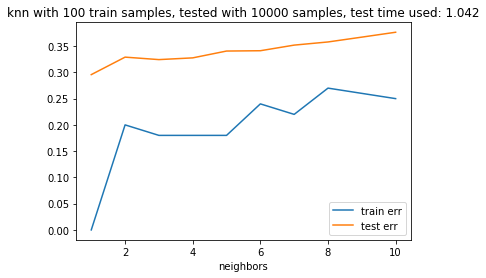

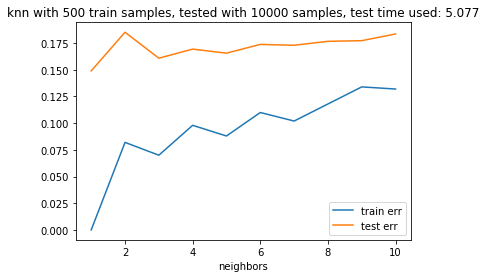

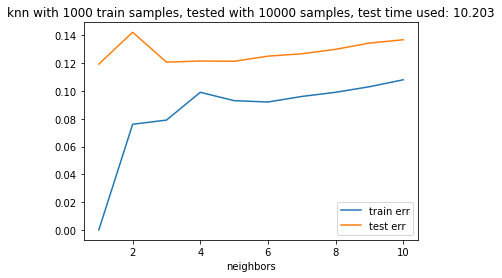

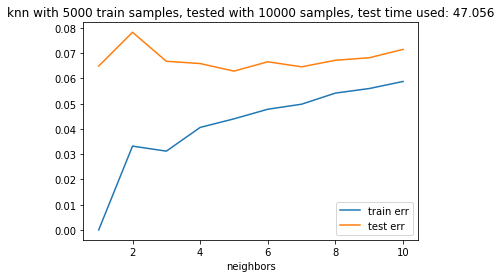

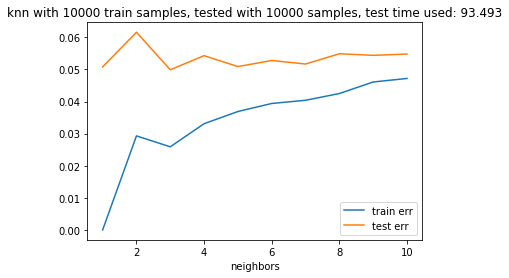

In [51]:
i = 0
for size in sample_size:
    print("knn with ", size, "train samples")
    print("train time: ", stats[i]["time_train"])
    print("test with 10000 samples, time: ", stats[i]["time_test"])
    temp = stats[i]["errors"].set_index("neighbors")
    temp.plot(title="knn with {0} train samples, tested with 10000 samples, test time used: {1}".format(size, round(stats[i]["time_test"],3)))
    i+=1;
    

In [55]:
i = 0
for size in sample_size:
    temp = stats[i]["errors"].set_index("neighbors")
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        temp.ti
        display(temp)
    i+=1

,train err,test err
neighbors,,
1,0.00,0.2957
2,0.20,0.3290
3,0.18,0.3243
4,0.18,0.3276
5,0.18,0.3406
6,0.24,0.3412
7,0.22,0.3519
8,0.27,0.3579
9,0.26,0.3671


,train err,test err
neighbors,,
1,0.000,0.1490
2,0.082,0.1852
3,0.070,0.1609
4,0.098,0.1694
5,0.088,0.1656
6,0.110,0.1738
7,0.102,0.1730
8,0.118,0.1767
9,0.134,0.1773


,train err,test err
neighbors,,
1,0.000,0.1193
2,0.076,0.1422
3,0.079,0.1207
4,0.099,0.1215
5,0.093,0.1213
6,0.092,0.1250
7,0.096,0.1267
8,0.099,0.1299
9,0.103,0.1344


,train err,test err
neighbors,,
1,0.0000,0.0649
2,0.0332,0.0783
3,0.0312,0.0668
4,0.0406,0.0659
5,0.0440,0.0629
6,0.0478,0.0666
7,0.0498,0.0646
8,0.0542,0.0672
9,0.0560,0.0682


,train err,test err
neighbors,,
1,0.0000,0.0508
2,0.0293,0.0616
3,0.0259,0.0499
4,0.0331,0.0543
5,0.0369,0.0509
6,0.0394,0.0528
7,0.0404,0.0517
8,0.0425,0.0549
9,0.0461,0.0544
